In [118]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import plot_tree

In [101]:
results = pd.read_csv('test-log.csv')

In [102]:
results

,prune_v0,prune_v1,prune_v2,prune_v3,prune_v4,prune_v5,prune_v6,prune_v7,prune_v8,prune_v9,prune_v10,prune_v11,mean_class_acc
0,0.28,0.22,0.34,0.50,0.70,0.04,0.12,0.44,0.28,0.34,0.22,0.26,0.881212
1,0.48,0.62,0.48,0.90,0.44,0.50,0.18,0.62,0.68,0.40,0.88,0.74,0.813939
2,0.46,0.34,0.16,0.58,0.74,0.58,0.60,0.28,0.16,0.28,0.70,0.72,0.852424
3,0.24,0.24,0.24,0.80,0.94,0.48,0.30,0.56,0.64,0.98,0.70,0.60,0.833636
4,0.66,0.12,0.28,0.34,0.20,0.82,0.76,0.60,0.74,0.34,0.08,0.94,0.823636
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,0.38,0.54,0.82,0.76,0.76,0.18,0.26,0.34,0.04,0.38,0.54,0.34,0.866061
1408,0.58,0.06,0.56,0.08,0.86,0.42,0.82,0.86,0.10,0.06,0.52,0.90,0.872424
1409,0.94,0.28,0.10,0.88,0.04,0.46,0.44,0.94,0.44,1.00,0.46,0.24,0.205758
1410,0.66,0.58,0.22,0.16,0.24,0.14,0.68,0.36,0.52,0.92,0.10,0.66,0.874242


In [89]:
X = results.iloc[:, :-1].values
Y = results.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [105]:
[X.shape, Y.shape], [X_train.shape, y_train.shape], [X_test.shape, y_test.shape]

([(1412, 12), (1412,)], [(1129, 12), (1129,)], [(283, 12), (283,)])

In [91]:
model = XGBRegressor(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist'
)

In [92]:
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [93]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [94]:
y_pred = model.predict(X_test)

In [95]:
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("Accuracy:", model.score(X_test, y_test))

R² Score: 0.916608707226841
MSE: 0.005687428019942076
Accuracy: 0.916608707226841


In [96]:
importance = model.feature_importances_

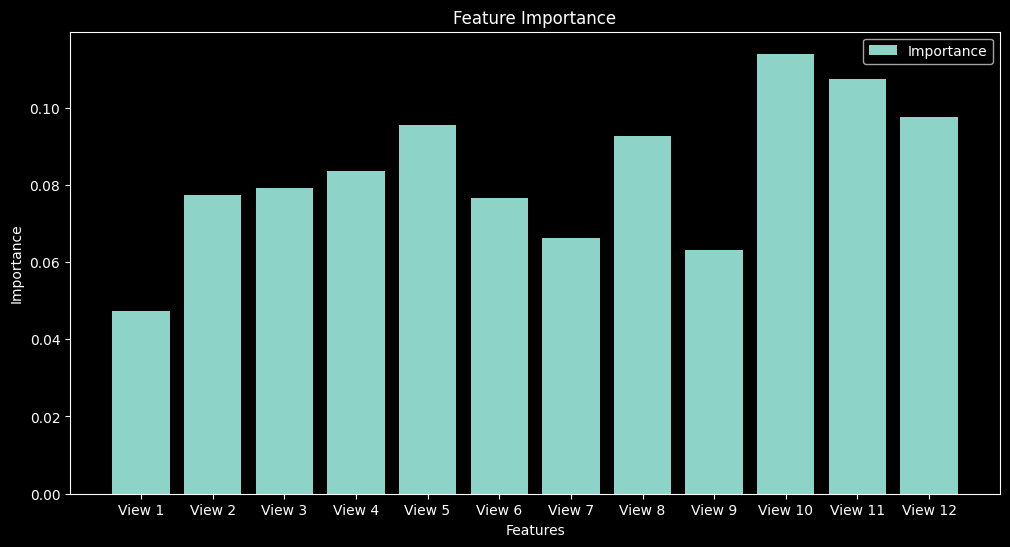

In [97]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(importance)), importance, tick_label=[f'View {i+1}' for i in range(len(importance))])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.legend(['Importance'])
plt.show()

In [98]:
input_data = [[1.0]*12]

In [99]:
model.predict(input_data)

array([-0.19028632], dtype=float32)

<Figure size 1000x600 with 0 Axes>

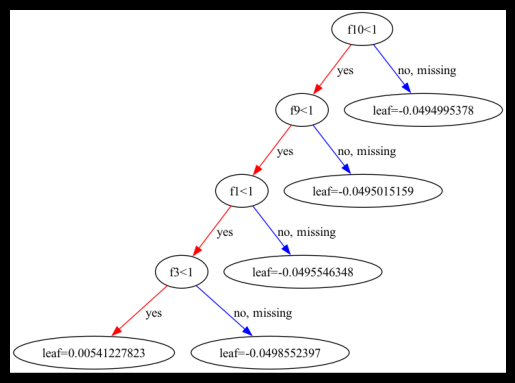

In [122]:
plt.figure(figsize=(10, 6))
plot_tree(model, rankdir='TD')
plt.show()

In [136]:
print("\n".join([model.get_booster().get_dump()[i] for i in range(20)]))

0:[f10<1] yes=1,no=2,missing=2
	1:[f9<1] yes=3,no=4,missing=4
		3:[f1<1] yes=5,no=6,missing=6
			5:[f3<1] yes=7,no=8,missing=8
				7:leaf=0.00541227823
				8:leaf=-0.0498552397
			6:leaf=-0.0495546348
		4:leaf=-0.0495015159
	2:leaf=-0.0494995378

0:[f4<1] yes=1,no=2,missing=2
	1:[f2<1] yes=3,no=4,missing=4
		3:[f10<1] yes=5,no=6,missing=6
			5:[f11<1] yes=7,no=8,missing=8
				7:leaf=0.00472468417
				8:leaf=-0.0506235324
			6:leaf=-0.0451775491
		4:leaf=-0.049312409
	2:leaf=-0.0519348979

0:[f3<1] yes=1,no=2,missing=2
	1:[f4<1] yes=3,no=4,missing=4
		3:[f5<1] yes=5,no=6,missing=6
			5:[f9<1] yes=7,no=8,missing=8
				7:leaf=0.00467128074
				8:leaf=-0.0453626849
			6:leaf=-0.0507360883
		4:leaf=-0.0464981906
	2:leaf=-0.0453571789

0:[f10<1] yes=1,no=2,missing=2
	1:[f2<1] yes=3,no=4,missing=4
		3:[f0<1] yes=5,no=6,missing=6
			5:[f5<1] yes=7,no=8,missing=8
				7:leaf=0.00472265854
				8:leaf=-0.0447684713
			6:leaf=-0.0500766002
		4:leaf=-0.0437049977
	2:leaf=-0.0409889184

0:[f8<1] yes=